# Quiz 5

In [57]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import seaborn as sb

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline


In [78]:
# 1. 
df = pd.read_csv('data/tdata/trees.csv')

x_data = df.iloc[:,:-1]
y_data = df.iloc[:,[-1]]

fn = len(x_data.columns)

scaler = MinMaxScaler()
x_data_scd = scaler.fit_transform(x_data)

x = tf.constant(x_data_scd, tf.float32)
y = tf.constant(y_data, tf.float32)

w = tf.Variable(tf.random.uniform([fn,1]))
b = tf.Variable(tf.random.uniform([1]))

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Girth   31 non-null     float64
 1   Height  31 non-null     int64  
 2   Volume  31 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 872.0 bytes


In [74]:
def compute_loss():
    hx = tf.matmul(x,w) + b
    cost = tf.reduce_mean((hx-y)**2)
    return cost

def hxFn(xdata):
    xtf = tf.constant(xdata, tf.float32)
    hx = tf.matmul(xtf,w) + b
    return hx.numpy()

In [61]:
patience = 100
min_delta = 0.01
pcnt = 0
hist_cost = []
optimizer = Adam(0.1)
for i in range(10000):
    optimizer.minimize(compute_loss, var_list=[w,b])
    
    c = compute_loss().numpy()
    hist_cost.append(c)
    print('{}, cost: {}'.format(i,c))
    
    if i==0:
        continue
    
    if hist_cost[i-1]-hist_cost[i] > min_delta: 
        pcnt=0
    else:
        pcnt += 1
    
    if pcnt >= patience:
        print('early stop')
        break

0, cost: 1079.7684326171875
1, cost: 1067.3643798828125
2, cost: 1055.0433349609375
3, cost: 1042.806884765625
4, cost: 1030.6558837890625
5, cost: 1018.5918579101562
6, cost: 1006.6161499023438
7, cost: 994.7299194335938
8, cost: 982.93408203125
9, cost: 971.22998046875
10, cost: 959.6184692382812
11, cost: 948.1006469726562
12, cost: 936.6774291992188
13, cost: 925.3495483398438
14, cost: 914.1181030273438
15, cost: 902.983642578125
16, cost: 891.947021484375
17, cost: 881.0087280273438
18, cost: 870.1696166992188
19, cost: 859.429931640625
20, cost: 848.7902221679688
21, cost: 838.2510375976562
22, cost: 827.8126831054688
23, cost: 817.475341796875
24, cost: 807.2394409179688
25, cost: 797.1051635742188
26, cost: 787.0725708007812
27, cost: 777.141845703125
28, cost: 767.3128662109375
29, cost: 757.5858154296875
30, cost: 747.9607543945312
31, cost: 738.4373779296875
32, cost: 729.0156860351562
33, cost: 719.6954956054688
34, cost: 710.4765625
35, cost: 701.3587646484375
36, cost: 6

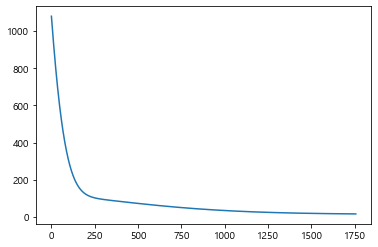

In [76]:
plt.plot(hist_cost);

In [73]:
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[51.092216],
       [12.549747]], dtype=float32)>

In [68]:
dense = Dense(units=1, input_dim=fn)
model = Sequential([dense])
model.compile(loss='mse', optimizer=Adam(0.1))
earlyStop = EarlyStopping(monitor='loss', patience=100, min_delta=0.01)
h = model.fit(x, y, epochs=10000, callbacks=[earlyStop])


Epoch 1/10000
1/1 [==============================] - 0s 164ms/step - loss: 1101.5758
Epoch 2/10000
1/1 [==============================] - 0s 4ms/step - loss: 1089.0150
Epoch 3/10000
1/1 [==============================] - 0s 1ms/step - loss: 1076.5356
Epoch 4/10000
1/1 [==============================] - 0s 0s/step - loss: 1064.1394
Epoch 5/10000
1/1 [==============================] - 0s 0s/step - loss: 1051.8276
Epoch 6/10000
1/1 [==============================] - 0s 0s/step - loss: 1039.6017
Epoch 7/10000
1/1 [==============================] - 0s 0s/step - loss: 1027.4623
Epoch 8/10000
1/1 [==============================] - 0s 0s/step - loss: 1015.4114
Epoch 9/10000
1/1 [==============================] - 0s 0s/step - loss: 1003.4499
Epoch 10/10000
1/1 [==============================] - 0s 0s/step - loss: 991.5790
Epoch 11/10000
1/1 [==============================] - 0s 0s/step - loss: 979.7995
Epoch 12/10000
1/1 [==============================] - 0s 16ms/step - loss: 968.1129
Epoch 13/

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Epoch 1900/10000
1/1 [==============================] - 0s 997us/step - loss: 15.0327
Epoch 1901/10000
1/1 [==============================] - 0s 997us/step - loss: 15.0277
Epoch 1902/10000
1/1 [==============================] - 0s 998us/step - loss: 15.0228
Epoch 1903/10000
1/1 [==============================] - 0s 2ms/step - loss: 15.0178
Epoch 1904/10000
1/1 [==============================] - 0s 997us/step - loss: 15.0129
Epoch 1905/10000
1/1 [==============================] - 0s 997us/step - loss: 15.0080
Epoch 1906/10000
1/1 [==============================] - 0s 998us/step - loss: 15.0031
Epoch 1907/10000
1/1 [==============================] - 0s 997us/step - loss: 14.9982
Epoch 1908/10000
1/1 [==============================] - 0s 997us/step - loss: 14.9933
Epoch 1909/10000
1/1 [==============================] - 0s 997us/step - loss: 14.9885
Epoch 1910/10000
1/1 [==============================] - 0s 997us/step - loss: 14.9836
Epoch 1911/10000
1/1 [==============================] - 

In [75]:
ex = pd.DataFrame(columns=['Girth','Height'])
ex['Girth'] = [8.8, 10.5]
ex['Height'] = [63, 72]

ex_scd = scaler.transform(ex_tf)

print(hxFn(ex_scd))

print(model.predict(ex_scd))

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[51.092216],
       [12.549747]], dtype=float32)>
[[ 4.968128]
 [16.73581 ]]
[[ 4.750268]
 [15.894032]]


In [71]:
ex_scd

array([[0.04065042, 0.        ],
       [0.17886179, 0.375     ]])

In [65]:
# 2.
str = ['크다' if i >=40 else '적음' for i in df['Volume']]
df['정도'] = str
df[['Volume', '정도']]

,Volume,정도
0,10.3,적음
1,10.3,적음
2,10.2,적음
3,16.4,적음
4,18.8,적음
5,19.7,적음
6,15.6,적음
7,18.2,적음
8,22.6,적음
9,19.9,적음


In [66]:
# 3.
print('최댓값 : ', df['Height'].max())
print('최솟값 : ', df['Height'].min())

최댓값 :  87
최솟값 :  63


In [67]:
# 4
df.nlargest(5, 'Girth', keep='all')

,Girth,Height,Volume,정도
30,20.6,87,77.0,크다
28,18.0,80,51.5,크다
29,18.0,80,51.0,크다
27,17.9,80,58.3,크다
26,17.5,82,55.7,크다
